In [29]:
import sys
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

import pandas as pd
from pandas import DataFrame

# Pendulum rod lengths (m), bob masses (kg).
L1, L2 = 0.5, 1
m1, m2 = 1, 2
# The gravitational acceleration (m.s-2).
g = 9.81

In [30]:
def deriv(y, t, L1, L2, m1, m2):
    """Return the first derivatives of y = theta1, z1, theta2, z2."""
    theta1, z1, theta2, z2 = y

    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1dot = z1
    z1dot = (m2*g*np.sin(theta2)*c - m2*s*(L1*z1**2*c + L2*z2**2) -
             (m1+m2)*g*np.sin(theta1)) / L1 / (m1 + m2*s**2)
    theta2dot = z2
    z2dot = ((m1+m2)*(L1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) + 
             m2*L2*z2**2*s*c) / L2 / (m1 + m2*s**2)
    return theta1dot, z1dot, theta2dot, z2dot

def calc_E(y):
    """Return the total energy of the system."""

    th1, th1d, th2, th2d = y.T
    V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
    T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 +
            2*L1*L2*th1d*th2d*np.cos(th1-th2))
    return T + V

In [31]:
# Maximum time, time point spacings and the time grid (all in s).
tmax, dt = 0.5, 0.05
t = np.arange(0, tmax+dt, dt)
no_samples = 200

len_instances = 11 

# print('len: ',len_instances)

data = np.zeros((len_instances*no_samples,4))

# print(data.shape)



for sample in range(no_samples):
    # Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
#     y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0])
#     y0 = np.random.rand(4)
    theta1_0 = 2*np.pi*(np.random.rand()-0.5)
    theta2_0 = 2*np.pi*(np.random.rand()-0.5)
    dtheta1_0 = 10*(np.random.rand()-0.5)
    dtheta2_0 = 10*(np.random.rand()-0.5)
    
    y0 = np.array([theta1_0, dtheta1_0,theta2_0, dtheta2_0])
    
#     print(y0.size)

    # Do the numerical integration of the equations of motion
    y = odeint(deriv, y0, t, args=(L1, L2, m1, m2))

    # Check that the calculation conserves total energy to within some tolerance.
    EDRIFT = 0.05
    # Total energy from the initial conditions
    E = calc_E(y0)
    if np.max(np.sum(np.abs(calc_E(y) - E))) > EDRIFT:
        sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

    # Unpack z and theta as a function of time
    theta1, theta2, dtheta1, dtheta2 = y[:,0] , y[:,2], y[:,1] , y[:,3]

#     print('size of theta1:', theta1.shape)
#     print('size of theta2:', theta2.shape)
    
#     print(theta1)
#     print(theta2)
    
    data[sample*len_instances:(sample+1)*len_instances,0] = theta1
    data[sample*len_instances:(sample+1)*len_instances,1] = theta2
    data[sample*len_instances:(sample+1)*len_instances,2] = dtheta1
    data[sample*len_instances:(sample+1)*len_instances,3] = dtheta2
    
print(data.shape)

(2200, 4)


In [32]:
df = pd.DataFrame(data, columns = ['theta_1','theta_2','dtheta_1','dtheta_2'])
df.iloc[[0,10,11,22,33],]

,theta_1,theta_2,dtheta_1,dtheta_2
0,-3.086407,1.902279,-0.296975,1.293649
10,-2.832753,1.337525,-0.348589,-3.717425
11,0.873261,2.461529,4.371944,0.533042
22,-0.381138,-1.274149,4.622276,-4.298566
33,0.956119,-0.768784,2.362976,0.524264


In [33]:
df.to_csv('double_pendulum_data.csv', sep = ',', index =False)

# data.tofile('double_pendulum_data.csv', sep = ',')

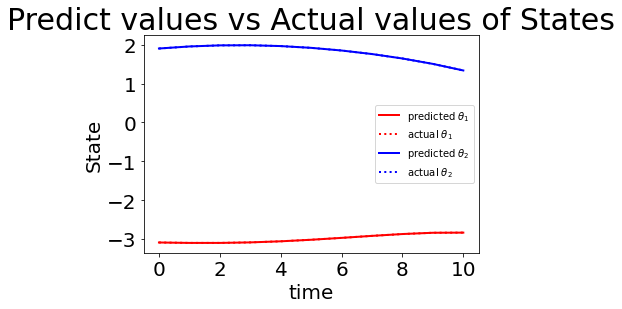

In [34]:
plt.figure()
plt.title('Predict values vs Actual values of States', fontsize=30)
plt.xlabel('time', fontsize=20)
plt.ylabel('State', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(data[:11,0], 'r',label=r'predicted $\theta_1$', linewidth = 2.0)
plt.plot(data[:11,0] , 'r' + ':', label=r'actual $\theta_1$', linewidth = 2.0)
plt.plot(data[:11,1], 'b',label=r'predicted $\theta_2$', linewidth = 2.0)
plt.plot(data[:11,1] , 'b' + ':', label=r'actual $\theta_2$', linewidth = 2.0)
plt.legend()
# plt.legend(['predicted $\theta_1$','actual $\theta_1$','predicted $\theta_2$','actual $\theta_2$'])
plt.show()
# plt.savefig('predicted vs actual %d.png' , dpi=72)
# plt.close()

In [35]:
# # Convert to Cartesian coordinates of the two bob positions.
# x1 = L1 * np.sin(theta1)
# y1 = -L1 * np.cos(theta1)
# x2 = x1 + L2 * np.sin(theta2)
# y2 = y1 - L2 * np.cos(theta2)

# # Plotted bob circle radius
# r = 0.05
# # Plot a trail of the m2 bob's position for the last trail_secs seconds.
# trail_secs = 1
# # This corresponds to max_trail time points.
# max_trail = int(trail_secs / dt)

# def make_plot(i):
#     # Plot and save an image of the double pendulum configuration for time
#     # point i.
#     # The pendulum rods.
#     ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')
#     # Circles representing the anchor point of rod 1, and bobs 1 and 2.
#     c0 = Circle((0, 0), r/2, fc='k', zorder=10)
#     c1 = Circle((x1[i], y1[i]), r, fc='b', ec='b', zorder=10)
#     c2 = Circle((x2[i], y2[i]), r, fc='r', ec='r', zorder=10)
#     ax.add_patch(c0)
#     ax.add_patch(c1)
#     ax.add_patch(c2)

#     # The trail will be divided into ns segments and plotted as a fading line.
#     ns = 20
#     s = max_trail // ns

#     for j in range(ns):
#         imin = i - (ns-j)*s
#         if imin < 0:
#             continue
#         imax = imin + s + 1
#         # The fading looks better if we square the fractional length along the
#         # trail.
#         alpha = (j/ns)**2
#         ax.plot(x2[imin:imax], y2[imin:imax], c='r', solid_capstyle='butt',
#                 lw=2, alpha=alpha)

#     # Centre the image on the fixed anchor point, and ensure the axes are equal
#     ax.set_xlim(-L1-L2-r, L1+L2+r)
#     ax.set_ylim(-L1-L2-r, L1+L2+r)
#     ax.set_aspect('equal', adjustable='box')
#     plt.axis('off')
#     plt.savefig('frames/_img{:04d}.png'.format(i//di), dpi=72)
#     plt.cla()


# # Make an image every di time points, corresponding to a frame rate of fps
# # frames per second.
# # Frame rate, s-1
# fps = 10
# di = int(1/fps/dt)
# fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
# ax = fig.add_subplot(111)

# for i in range(0, t.size, di):
#     print(i // di, '/', t.size // di)
#     make_plot(i)